In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

**Data Preparation and Data Cleaning**

In [2]:
df = pd.read_csv(r"C:\Users\Aron\Desktop\Diabetes-Prediction\data\diabetes_prediction_dataset.csv")
df = df.copy()

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [5]:
df.shape

(100000, 9)

In [6]:
diabetes_values = {
    0: 'No', 
    1: 'Yes'
}
df['diabetes'] = df['diabetes'].map(diabetes_values)


hypertension_values = {
    0: 'No Hypertension', 
    1: 'Has Hypertension'
}
df['hypertension'] = df['hypertension'].map(hypertension_values)

heart_disease_values = {
    0: 'No Heart_Disease', 
    1: 'Has Heart_Disease'
}
df['heart_disease'] = df['heart_disease'].map(heart_disease_values)


In [7]:
string_columns = list(df.dtypes[df.dtypes == object].index)

for c in string_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [8]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,female,80.0,no_hypertension,has_heart_disease,never,25.19,6.6,140,no
1,female,54.0,no_hypertension,no_heart_disease,no_info,27.32,6.6,80,no
2,male,28.0,no_hypertension,no_heart_disease,never,27.32,5.7,158,no
3,female,36.0,no_hypertension,no_heart_disease,current,23.45,5.0,155,no
4,male,76.0,has_hypertension,has_heart_disease,current,20.14,4.8,155,no


**EDA and Feature Importance**

In [41]:
df.dtypes

gender                  object
age                    float64
hypertension            object
heart_disease           object
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

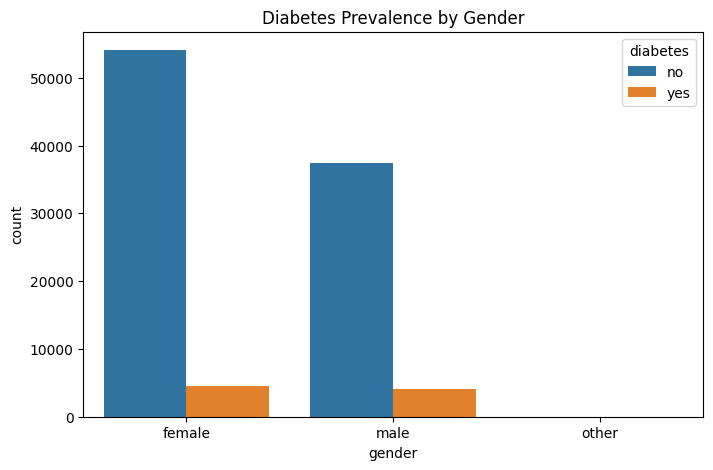

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='gender', hue='diabetes')
plt.title("Diabetes Prevalence by Gender")
plt.show()

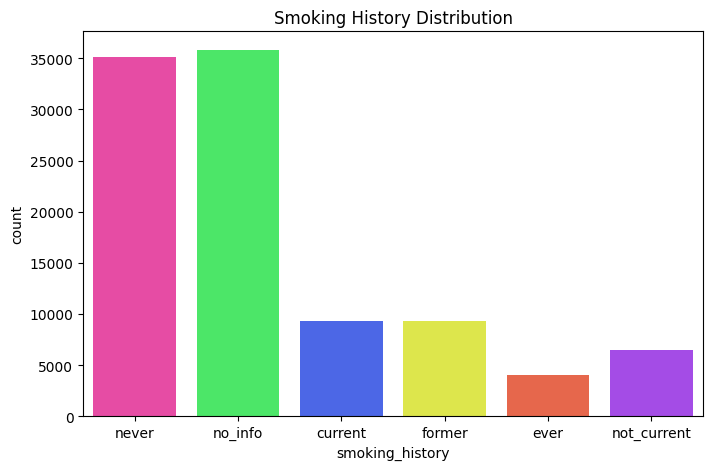

In [26]:
custom_palette = ["#FF33A8", "#33FF57", "#3357FF", "#F3FF33", "#FF5733", "#A833FF"]

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='smoking_history', palette=custom_palette)
plt.title("Smoking History Distribution")
plt.show()

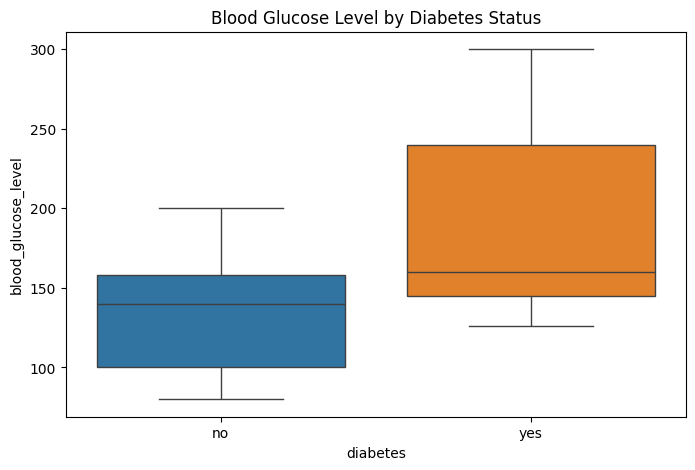

In [29]:
custom_palette = ["#1f77b4", "#ff7f0e"]

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='diabetes', y='blood_glucose_level', palette=custom_palette)
plt.title("Blood Glucose Level by Diabetes Status")
plt.show()

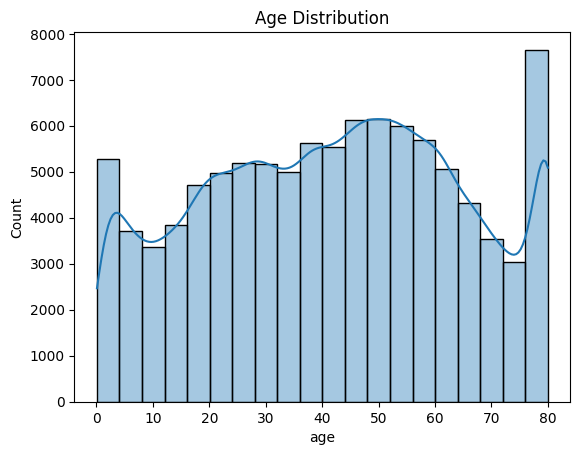

In [43]:
sns.histplot(df['age'], bins=20, alpha = 0.4, kde=True)
plt.title('Age Distribution')
plt.show()
#plt.label()

In [17]:
import plotly.express as px

fig = px.histogram(df, x='age', nbins=10)
fig.update_layout(title='Age Distribution')

fig.show()

Text(0.5, 1.0, 'bmi Distribution')

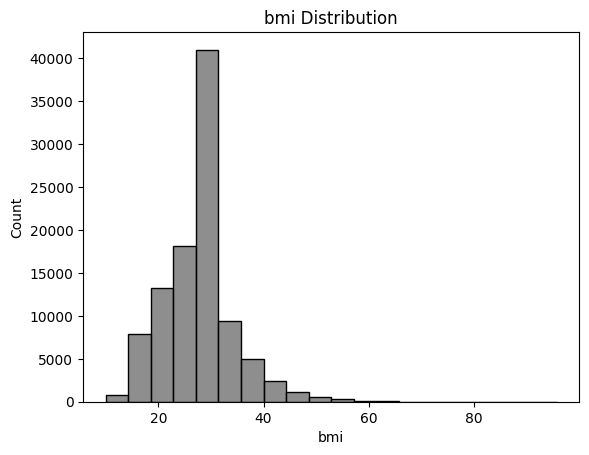

In [12]:
sns.histplot(df['bmi'], bins=20, color='dimgray')
plt.title(label='bmi Distribution')

Text(0.5, 1.0, 'HbA1c_level Distribution')

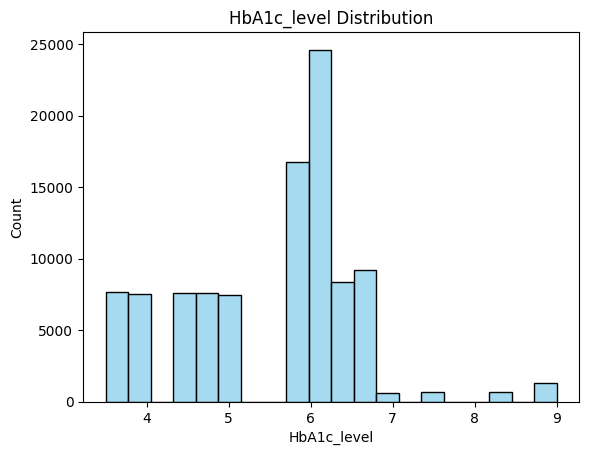

In [13]:
sns.histplot(df['HbA1c_level'], bins=20, color='skyblue')
plt.title(label='HbA1c_level Distribution')

In [16]:
fig = px.histogram(df, x='blood_glucose_level', nbins=12)

fig.show()

In [17]:
df.describe().round()

,age,bmi,HbA1c_level,blood_glucose_level
count,100000.0,100000.0,100000.0,100000.0
mean,42.0,27.0,6.0,138.0
std,23.0,7.0,1.0,41.0
min,0.0,10.0,4.0,80.0
25%,24.0,24.0,5.0,100.0
50%,43.0,27.0,6.0,140.0
75%,60.0,30.0,6.0,159.0
max,80.0,96.0,9.0,300.0


In [33]:
df.diabetes = (df.diabetes == 'yes').astype(int)

In [31]:
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

In [34]:
df.groupby(by='diabetes')[numerical_features].mean()

,age,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,
0,40.115187,26.887163,5.396761,132.852470
1,60.946588,31.988382,6.934953,194.094706


**Feature Importance: Correlation**

In [35]:
correlation_matrix = df[numerical_features].corrwith(df.diabetes).to_frame('Correlation')
correlation_matrix.sort_values(by='Correlation', ascending=False)

,Correlation
blood_glucose_level,0.419558
HbA1c_level,0.400660
age,0.258008
bmi,0.214357


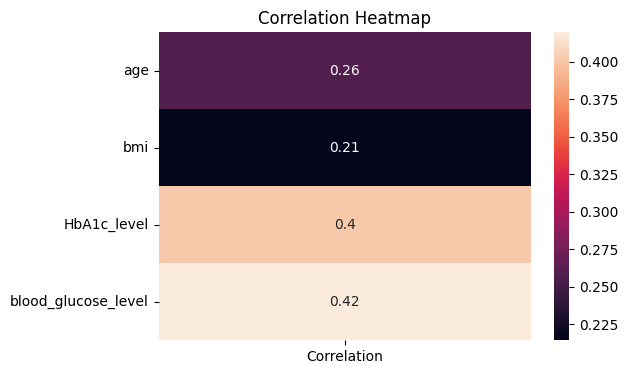

In [40]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()

**Feature Importance: Mutual information**

In [22]:
from sklearn.metrics import mutual_info_score

In [23]:
def calculate_mi(series):
    return mutual_info_score(series, df.diabetes)

df_mi = df[categorical_features].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame('MI')

display(df_mi)

""" Hypertension has the highest importance, suggesting it is the most influential factor among these features,
    while "Gender" has the least impact. """


,MI
hypertension,0.013512
smoking_history,0.009828
heart_disease,0.009459
gender,0.000716


' Hypertension has the highest importance, suggesting it is the most influential factor among these features,\n    while "Gender" has the least impact. '

Setting up Validation framework

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
df_full_train, df_test=train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val=train_test_split(df_full_train, test_size=0.25, random_state=1)

In [26]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [ ]:
y_train=df_train.diabetes.values
y_val=df_val.diabetes.values
y_test=df_test.diabetes.values

In [28]:
del df_train['diabetes']
del df_val['diabetes']
del df_test['diabetes']

**One-Hot encoding**

In [29]:
from sklearn.feature_extraction import DictVectorizer

In [30]:
train_dict = df_train[categorical_features + numerical_features].to_dict(orient='records')
val_dict = df_val[categorical_features + numerical_features].to_dict(orient='records')

In [31]:
dv = DictVectorizer(sparse=False)

In [32]:
X_train=dv.fit_transform(train_dict)
X_val=dv.transform(val_dict)

**Train Logistic Regression**

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [34]:
def train(df_train, y_train):
    train_dict = df_train[categorical_features + numerical_features].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train=dv.fit_transform(train_dict)
    
    model = LogisticRegression(C=1.0, max_iter=10000)
    model.fit(X_train, y_train)
    
    return dv,model

In [35]:
dv,model = train(df_train, y_train)

In [36]:
def predict(df, dv, model):
    dicts = df[categorical_features + numerical_features].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [37]:

y_pred = predict(df_val, dv, model)
auc = roc_auc_score(y_val, y_pred)
print(f'auc on validation set: %.3f' % auc)

auc on validation set: 0.959


In [38]:
y_pred = predict(df_test, dv, model)
auc = roc_auc_score(y_test, y_pred)
print(f'auc on the test set: %.3f' % auc)

auc on the test set: 0.963


**Training Decision Trees**

In [39]:
from sklearn.tree import DecisionTreeClassifier


In [40]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [41]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.8321385902031063)

Parameter tuning

In [42]:
depth = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for d in depth:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print('%4s -> %.3f' % (d, auc))


   1 -> 0.736
   2 -> 0.832
   3 -> 0.902
   4 -> 0.934
   5 -> 0.950
   6 -> 0.960
  10 -> 0.973
  15 -> 0.938
  20 -> 0.884
None -> 0.855


In [43]:
scores=[]
for d in [5,6,10]:
    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((d, s, auc))


In [44]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)


In [45]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc             
max_depth           5     6      10
min_samples_leaf                   
1                 0.95  0.96  0.973
5                 0.95  0.96  0.973
10                0.95  0.96  0.973
15                0.95  0.96  0.973
20                0.95  0.96  0.973
50                0.95  0.96  0.973
100               0.95  0.96  0.973
200               0.95  0.96  0.974

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

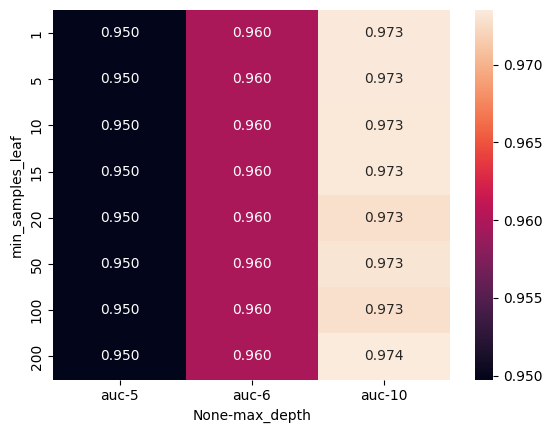

In [46]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")


In [47]:
max_depth = 10
min_sample_leaf = 200

In [48]:
dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_sample_leaf)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=200)

**Random Forest**

In [49]:
from sklearn.ensemble import RandomForestClassifier


In [50]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [51]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)


np.float64(0.925730295376541)

In [52]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [53]:
df_scores = pd.DataFrame(data=scores, columns=['n_estimators', 'auc'])
df_scores

,n_estimators,auc
0,10,0.924833
1,20,0.941201
2,30,0.945618
3,40,0.951088
4,50,0.953210
5,60,0.955287
6,70,0.956709
7,80,0.957479
8,90,0.958097
9,100,0.959021


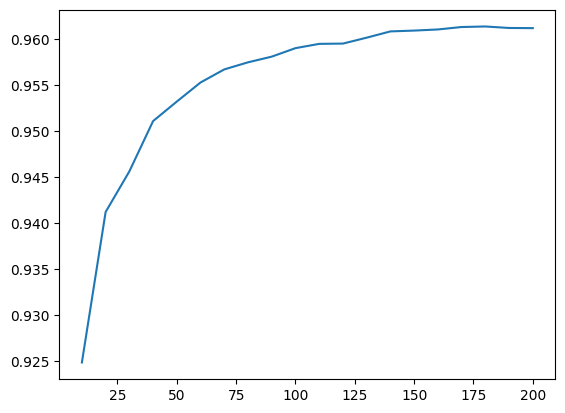

In [54]:
plt.plot(df_scores.n_estimators, df_scores.auc)


**Random forest Parameter Tuning**

In [55]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [56]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

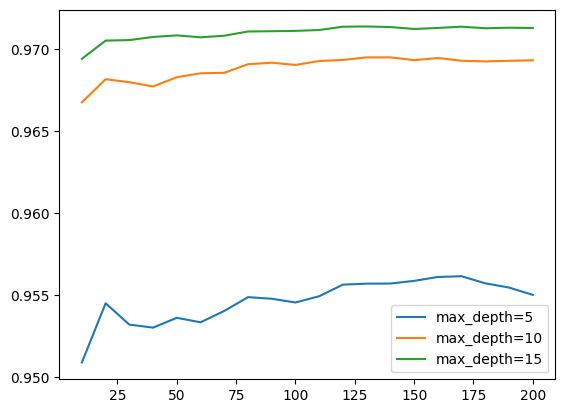

In [57]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [58]:
max_depth = 15

In [59]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [60]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

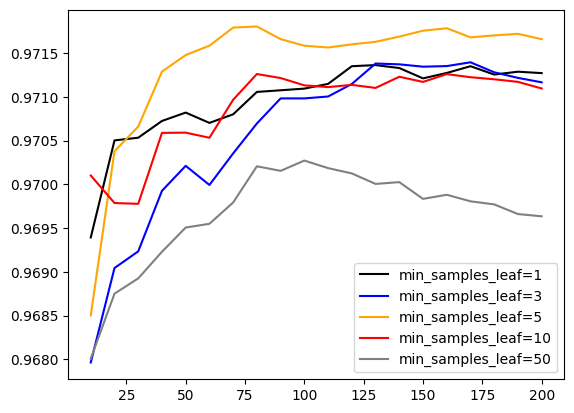

In [61]:
leaf_color_map = {
    1: 'black',
    3: 'blue',
    5: 'orange',
    10: 'red',
    50: 'grey'
}

for s, col in leaf_color_map.items():
    df_subset = df_scores[df_scores['min_samples_leaf'] == s]
    
    plt.plot(df_subset['n_estimators'], df_subset['auc'],
             color=col,
             label=f'min_samples_leaf={s}')

plt.legend()

In [62]:
min_samples_leaf = 5


In [63]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=200,
                       random_state=1)

**Xgboost model**

In [64]:
import xgboost as xgb


In [65]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [66]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [67]:
y_pred = model.predict(dval)


In [68]:
watchlist = [(dtrain, 'train'), (dval, 'val')]


In [69]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [70]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [71]:
df_score = parse_xgb_output(output)

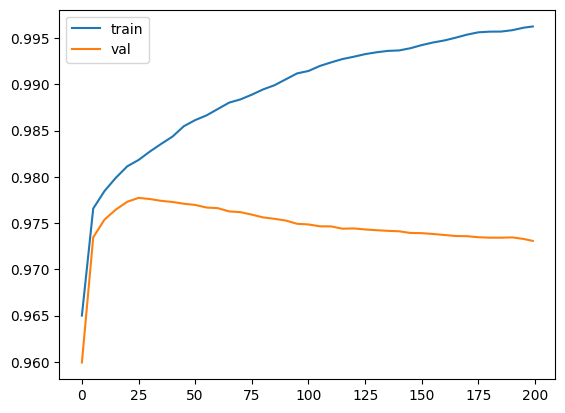

In [72]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

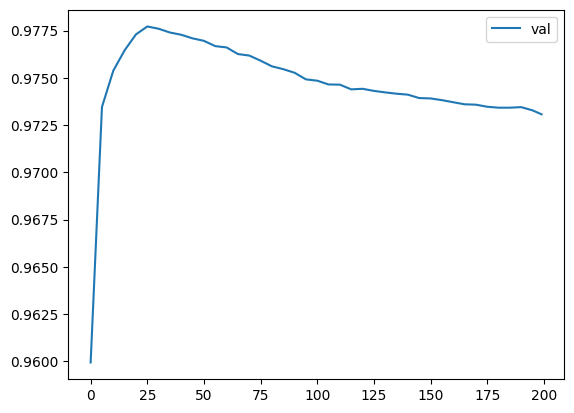

In [73]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

XGBoost parameter tuning

In [87]:
#eta
scores={}

In [94]:
%%capture output

xgb_params = {
    'eta': 1.0, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [95]:
key = f"eta = {xgb_params['eta']}"
scores[key] = parse_xgb_output(output)
key


'eta = 1.0'

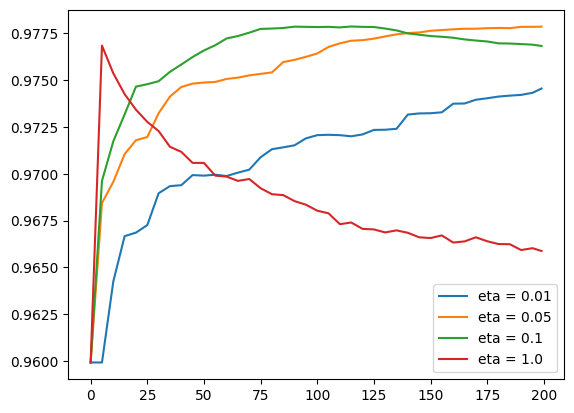

In [96]:
for eta, df_score in scores.items():
    
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
    
plt.legend()


max_depth tuning

In [78]:
scores = {}


In [79]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [80]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=6'

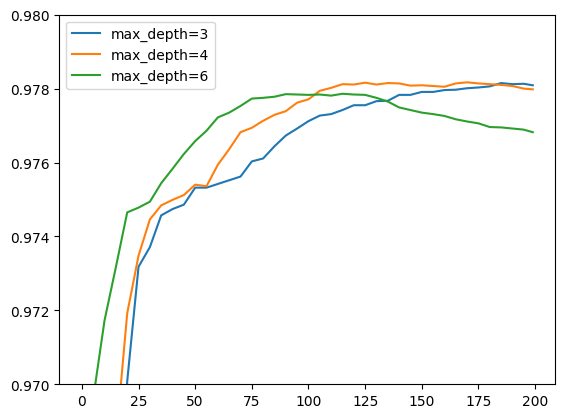

In [ ]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.97, 0.98)
plt.legend()

min_child_weight tuning

In [ ]:
scores = {}


In [ ]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 4,
    'min_child_weight': 15,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=15'

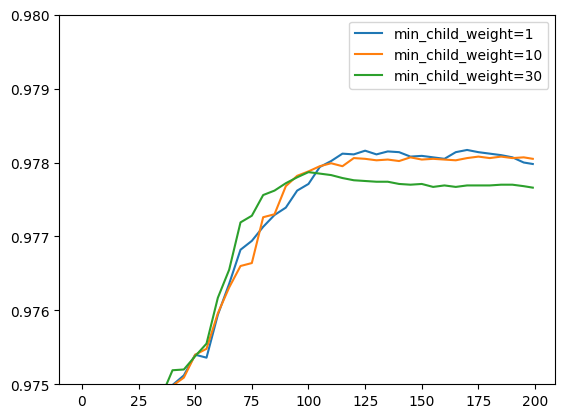

In [ ]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.ylim(0.975, 0.98)
plt.legend()

In [ ]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 4,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

**Selecting the final model**


In [ ]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=200)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('dt model auc =', round(auc,3))

dt model auc = 0.974


In [ ]:
rf = RandomForestClassifier(n_estimators=175,
                            max_depth=15,
                            min_samples_leaf=1,
                            random_state=1)

rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('rf model auc =', round(auc,3))

rf model auc = 0.971


In [ ]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 4,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [ ]:
y_pred = model.predict(dval)
auc = roc_auc_score(y_val, y_pred)
print('xgb model auc = %.3f' % auc)

xgb model auc = 0.978
